# Acrobot

![title](acrobat_pic.png)

The acrobot system includes two joints and two links, where the joint between the two links is actuated. Initially, the links are hanging downwards, and the goal is to swing the end of the lower link up to a given height.

# Load Packages

In [1]:
import swat
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import time
import gym

# Make Environment

In [2]:
env = gym.make('Acrobot-v1')

In [3]:
#DocString
?env.env

In [4]:
# Env Actions
#The action is either applying +1, 0 or -1 torque on the joint between the two pendulum links
env.action_space

Discrete(3)

In [5]:
# Env Observation
# The state consists of the sin() and cos() of the two rotational joint angles and the joint angular velocities :
# [cos(theta1) sin(theta1) cos(theta2) sin(theta2) thetaDot1 thetaDot2]
env.observation_space

Box(-28.274333953857422, 28.274333953857422, (6,), float32)

In [6]:
# Random Torque Policy
env.reset()
for i in range(300):
    action = env.action_space.sample()
    env.step(action)
    env.render()
    time.sleep(0.01)
    
env.close()

# Connect to CAS

In [7]:
conn = swat.CAS("server", 30571, "student", "Metadata0")

# Create SAS RL Environment URL

In [8]:
cmd_data = subprocess.check_output(['ipconfig','/all']).decode('utf-8').split('\n')
ip_data = [item for item in cmd_data if "IPv4 Address" in item]
computer_id = ip_data[0].split(": ")[1].split("(")[0]
sasrl_env_port = "10200"
sasrl_env_url = computer_id + ":" + sasrl_env_port

# Load the RL Action Set

In [9]:
conn.loadactionset('reinforcementLearn')

NOTE: Added action set 'reinforcementLearn'.


[actionset]

 'reinforcementLearn'

+ Elapsed: 0.32s, user: 0.615s, sys: 0.899s, mem: 0.255mb

# Train the Agent - Deep Q Networks

In [10]:
results = conn.reinforcementLearn.rlTrainDqn(
    
    # RL Arguments
    environment=dict(type='remote', url=sasrl_env_url, name='Acrobot-v1', render=False, seed=802),
    exploration = dict(type="linear", initialEpsilon=0.99, minEpsilon=0.05),
    gamma = 0.99,
    numEpisodes = 200,
    
    # NN Arguments
    QModel=[{'type':'FC', 'n':64, 'act':'RELU'}],
    optimizer=dict(method='ADAM', beta1=0.9, beta2=0.999, learningRate=0.001, miniBatchSize=128),
    minReplayMemory = 100,
    maxReplayMemory = 1000,
    targetUpdateInterval = 100,
    
    # Test Arguments
    testInterval = 10,
    numTestEpisodes = 5,
    
    # Other Arguments
    modelOut=dict(name='dqn_weights', replace=True),
    seed = 919
    
)

         Episode=        0 AvgQValue=-3.361 AvgTarget=-4.259 AvgLoss= 0.831 TestReward=  -500
         Episode=       10 AvgQValue=-34.15 AvgTarget=-34.62 AvgLoss=0.5785 TestReward=  -500
         Episode=       20 AvgQValue=-39.54 AvgTarget=-39.56 AvgLoss=1.4331 TestReward=-342.6
         Episode=       30 AvgQValue=-37.56 AvgTarget=-37.54 AvgLoss=2.4579 TestReward=  -500
         Episode=       40 AvgQValue=-38.72 AvgTarget= -38.6 AvgLoss=1.0522 TestReward= -99.2
         Episode=       50 AvgQValue=-32.47 AvgTarget=-32.37 AvgLoss=1.6478 TestReward= -94.4
         Episode=       60 AvgQValue=-36.02 AvgTarget=-35.61 AvgLoss=7.0362 TestReward=   -90
         Episode=       70 AvgQValue=-36.19 AvgTarget=-36.36 AvgLoss=1.2689 TestReward= -94.8
         Episode=       80 AvgQValue=-27.69 AvgTarget=-27.66 AvgLoss=2.2579 TestReward= -82.8
         Episode=       90 AvgQValue=-32.25 AvgTarget=-32.49 AvgLoss=1.2431 TestReward=   -87
         Episode=      100 AvgQValue=-31.31 AvgTarget=-31.23

In [11]:
results['FinalResult']

,Description,Value
0,Average QValue,-23.871671
1,Average Target Value,-23.757871
2,Test Reward,-95.400000


In [12]:
results['ModelInfo']

,Property,Value
0,Number of State Variables,6
1,Number of Actions,3
2,Algorithm,DQN
3,Optimizer,ADAM


In [13]:
results['OptIterHistory']

,Iteration,AvgQValue,AvgTarget,AvgLoss,Test Reward
0,0,-3.361442,-4.259153,0.830971,-500.0
1,10,-34.154163,-34.621089,0.578458,-500.0
2,20,-39.542554,-39.561314,1.433075,-342.6
3,30,-37.561484,-37.541616,2.457869,-500.0
4,40,-38.716264,-38.603473,1.052196,-99.2
5,50,-32.472944,-32.372946,1.647808,-94.4
6,60,-36.022883,-35.614051,7.036220,-90.0
7,70,-36.190047,-36.357839,1.268901,-94.8
8,80,-27.691460,-27.655374,2.257946,-82.8
9,90,-32.252912,-32.485673,1.243068,-87.0


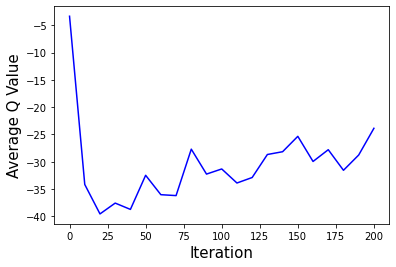

In [14]:
plt.plot(results['OptIterHistory']['Iteration'],results['OptIterHistory']['AvgQValue'], color="blue")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Average Q Value", fontsize=15)
plt.show()

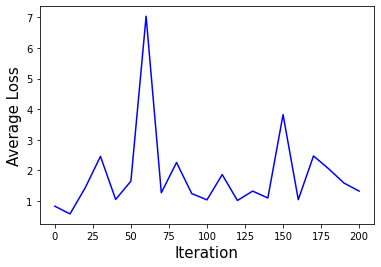

In [15]:
plt.plot(results['OptIterHistory']['Iteration'],results['OptIterHistory']['AvgLoss'], color="blue")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Average Loss", fontsize=15)
plt.show()

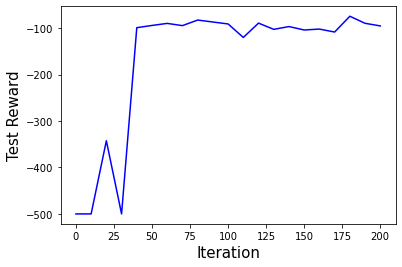

In [16]:
plt.plot(results['OptIterHistory']['Iteration'],results['OptIterHistory']['Test Reward'], color="blue")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Test Reward", fontsize=15)
plt.show()

# Score the Model

In [17]:
conn.reinforcementLearn.rlScore(
    environment=dict(type='remote', url=sasrl_env_url, name='Acrobot-v1', 
                     render=True, renderFreq=10, renderSleep=0.02, seed=802),
    model='dqn_weights',
    numEpisodes=1,
    logFreq=1,
    casout=dict(name='scored_table', replace=True)
)

         Episode=        1 Step=        1 LastReward=     0 AverageReward=    -1
         Episode=        1 Step=        2 LastReward=     0 AverageReward=    -2
         Episode=        1 Step=        3 LastReward=     0 AverageReward=    -3
         Episode=        1 Step=        4 LastReward=     0 AverageReward=    -4
         Episode=        1 Step=        5 LastReward=     0 AverageReward=    -5
         Episode=        1 Step=        6 LastReward=     0 AverageReward=    -6
         Episode=        1 Step=        7 LastReward=     0 AverageReward=    -7
         Episode=        1 Step=        8 LastReward=     0 AverageReward=    -8
         Episode=        1 Step=        9 LastReward=     0 AverageReward=    -9
         Episode=        1 Step=       10 LastReward=     0 AverageReward=   -10
         Episode=        1 Step=       11 LastReward=     0 AverageReward=   -11
         Episode=        1 Step=       12 LastReward=     0 AverageReward=   -12
         Episode=        1 S

,Property,Value
0,Number of State Variables,6
1,Number of Actions,3
2,Algorithm,DQN
3,Optimizer,ADAM


# Download Final Test

In [18]:
scored_table = conn.CASTable(name = "scored_table")
df = scored_table.to_frame()
df

,_Step_,_Episode_,_State_0,_State_1,_State_2,_State_3,_State_4,_State_5,_Action_,_Reward_,_Done_
0,0.0,1.0,0.998835,-0.048255,0.997496,-0.070729,-0.027052,0.020859,2.0,-1.0,0.0
1,1.0,1.0,0.998071,-0.062085,0.999555,-0.029830,-0.107286,0.379262,2.0,-1.0,0.0
2,2.0,1.0,0.996088,-0.088365,0.997240,0.074251,-0.147451,0.639837,2.0,-1.0,0.0
3,3.0,1.0,0.993174,-0.116641,0.976957,0.213436,-0.126249,0.738671,2.0,-1.0,0.0
4,4.0,1.0,0.990920,-0.134451,0.936685,0.350173,-0.045292,0.661347,2.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
104,104.0,1.0,0.270541,0.962709,-0.960314,-0.278920,4.655179,-1.393171,2.0,-1.0,0.0
105,105.0,1.0,-0.500214,0.865902,-0.978154,-0.207879,3.325800,0.571691,2.0,-1.0,0.0
106,106.0,1.0,-0.877340,0.479869,-0.890348,-0.455281,2.175297,1.947776,2.0,-1.0,0.0
107,107.0,1.0,-0.985973,0.166907,-0.586795,-0.809736,1.181821,2.652052,1.0,-1.0,0.0


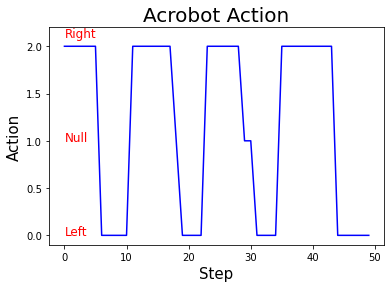

In [19]:
plt.plot(df["_Action_"][:50], color="blue")
plt.title("Acrobot Action", fontsize=20)
plt.xlabel("Step", fontsize=15)
plt.ylabel("Action", fontsize=15)
plt.ylim(-0.1,2.2)
plt.text(0,0,"Left", color="red", fontsize=12)
plt.text(0,1,"Null", color="red", fontsize=12)
plt.text(0,2.1,"Right", color="red", fontsize=12)
plt.show()

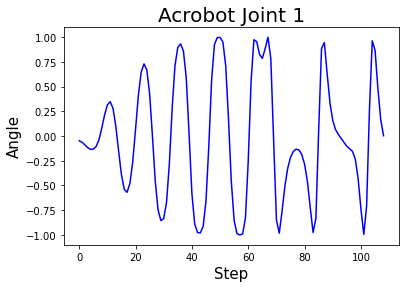

In [20]:
plt.plot(df["_State_1"], color="blue")
plt.title("Acrobot Joint 1", fontsize=20)
plt.xlabel("Step", fontsize=15)
plt.ylabel("Angle", fontsize=15)
plt.show()

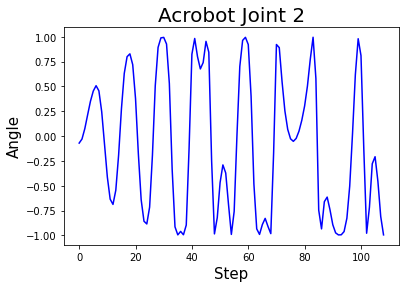

In [21]:
plt.plot(df["_State_3"], color="blue")
plt.title("Acrobot Joint 2", fontsize=20)
plt.xlabel("Step", fontsize=15)
plt.ylabel("Angle", fontsize=15)
plt.show()

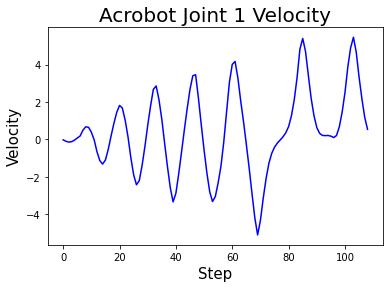

In [22]:
plt.plot(df["_State_4"], color="blue")
plt.title("Acrobot Joint 1 Velocity", fontsize=20)
plt.xlabel("Step", fontsize=15)
plt.ylabel("Velocity", fontsize=15)
plt.show()

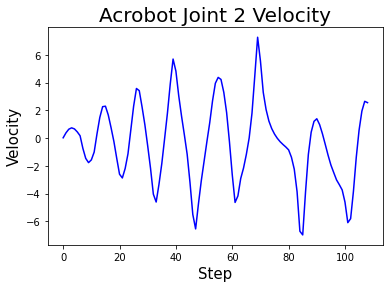

In [23]:
plt.plot(df["_State_5"], color="blue")
plt.title("Acrobot Joint 2 Velocity", fontsize=20)
plt.xlabel("Step", fontsize=15)
plt.ylabel("Velocity", fontsize=15)
plt.show()

# End the Session

In [24]:
conn.session.endSession()

+ Elapsed: 0.00053s, user: 0.000453s, mem: 0.203mb